

# Research: Cepheid light curves

Let's put together some of the skills you've learned! You will need the file located here: `data/cepheid.txt`. Read in this file using the functions we worked on in Lesson 6. This file contains flux measurements from a variable star over time. In this notebook, your task will be to _measure the approximate distance to this star_. **Bold text** makes clear what your task is in each cell. 

### Read in and plot the data
We have used the function `ascii.read` to read in data before (see `06-plotting_Lastname.ipynb` for example). **Use `ascii.read` to load the file `data/cepheid.txt` into a variable `data_table`**:

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from astropy.io import ascii

This data table has a column called `Time` which tells you the time of each brightness measurement (units of days) and a column called `Red` and `Blue` which tells you the flux of the star through two filters. 

**Plot the red fluxes as a function of time and reproduce this plot using `matplotlib`**. 

![](data/example_plot_1.png)

In [3]:
# Check out the data - how many columns? what are each column?
data_table = ascii.read('cepheid.txt')

In [4]:
data_table[:]

Time,Blue,BlueSD,Red,RedSD
float64,float64,float64,float64,float64
202.6288,0.4887,0.117,0.4949,0.02505
205.7931,0.2359,0.0286,0.2853,0.027
206.8021,0.1545,0.02127,0.205,0.02149
209.823,-0.09302,0.01784,-0.04896,0.0181
210.8108,-0.1567,0.02407,-0.08673,0.02181
211.7849,-0.2108,0.01502,-0.1717,0.01477
...,...,...,...,...
598.5636,0.5531,0.0277,0.4328,0.02401
599.5488,0.4928,0.02429,0.4555,0.02243


Text(0, 0.5, 'Red Flux')

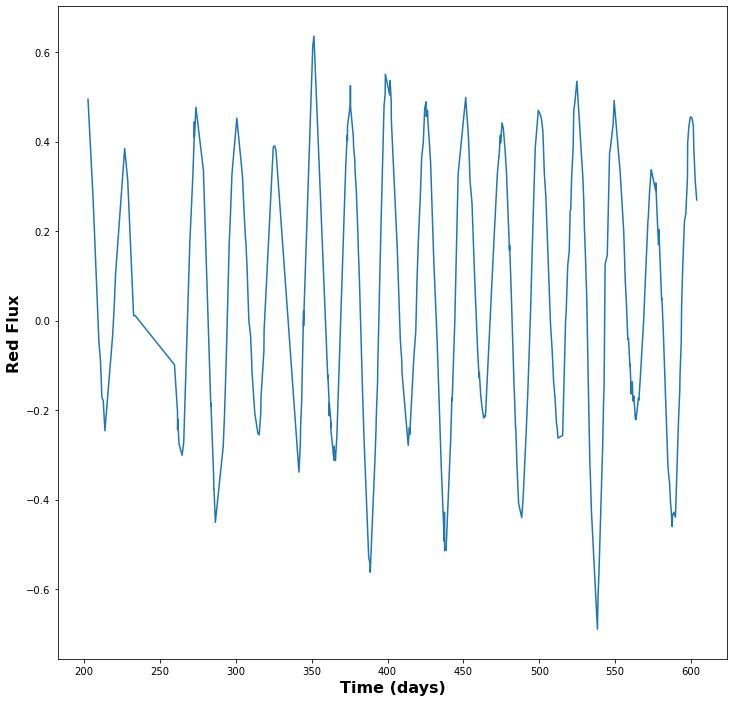

In [5]:
plt.figure(figsize=(12,12))

plt.plot(data_table['Time'], data_table['Red'])

plt.xlabel('Time (days)', fontweight='bold',fontsize=16)
plt.ylabel('Red Flux', fontweight='bold',fontsize=16)

This type of star is called a [Cepheid variable star](https://en.wikipedia.org/wiki/Classical_Cepheid_variable#Period-luminosity_relation). These stars are useful to astronomers because their flux varies in a predictable sinusoidal pattern. It turns out that the period of the flux oscillation is directly related to how intrinsically bright the star is – so if you know how long the period is, and you measure how dim the star _appears_ to be, you can estimate how far away it is because you know how bright it really is.  Begin by doing a NASA ADS search to find papers related to Cepheid variable stars.  Part of doing research is finding and reading the appropriate background literature.  This will help you build the introduction/background section of your final presentation.

### A very rough "model"

In the cell below, **estimate the period of this Cepheid** by plotting a sinusoidal function over the data. You can calculate flux if you have the period of variability using the following equation: 

$$\textrm{flux} = \textrm{amplitude} \times \sin \left( \frac{2\pi}{\textrm{period}} \left( \textrm{time} - \textrm{offset} \right) \right)$$

Hint: start with an `offset` of zero and a period somewhere between 24 and 25 days. The `time` variable in the funciton should be the `data_table['Time']` column that you read in and remember that the `sin` function is within numpy. Also, the `amplitude` variable is something you should just play around with. Try starting with `amplitude=0.5` and tweak it as necessary.

![](data/example_plot_2.png)



In [14]:
def flux(time, amp, period, offset):
    
    return amp * np.sin(((2*np.pi)/period)*(time-offset))

flux(data_table['Time'], 0.5, 24.5, 5)

0.20283713887374327
0.47111421592985464
0.4982866129799103
0.38501130006029105
0.29277112070499817
0.18347793537085863
0.07394627401413717
-0.06471427295474604
-0.4941080860498558
...
0.4715038027012066


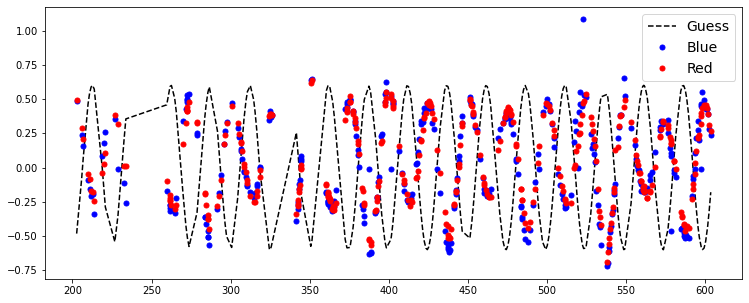

In [109]:
# Define some variables you'll need for your function
period_guess = 24.91636
amplitude_guess = 0.6
offset_guess = 7

# Set a figure size
plt.figure(figsize=(12.5,5))

# Plot my flux curve assuming the above values:
# Note: as long as your plot command is enclosed by (), 
# you can make it run more than oneline, 
# which helps when you've got a lot of arguments 
plt.plot(data_table['Time'],flux(data_table['Time'], amplitude_guess,
         period_guess, offset_guess),
         linestyle='--',color='k',label='Guess')

# Plot data points for blue and red magnitudes
plt.plot(data_table['Time'],data_table['Blue'],'o',markersize=5,
         color='Blue',label='Blue')
plt.plot(data_table['Time'],data_table['Red'],'o',markersize=5,
         color='Red',label='Red')

# Add a legend
plt.legend(fontsize=14)

### Period-luminosity relation

The brightness of this Cepheid variable star is related to its period by the _period-luminosity relation_: 

$$ M_{v}=-2.43 \left(\log _{{10}}( \textrm{period})-1\right) - 4.05 $$

where $M_v$ is the [_absolute magnitude_](https://en.wikipedia.org/wiki/Absolute_magnitude) of the star. Note that brighter stars have more negative absolute magnitudes. **Write a function** called `period_to_absolute_magnitude` which takes the period as the argument, and returns the absolute magnitude. 

**Create a range of periods and plot the corresponding absolute magnitudes using your function **

![](data/example_plot_3.png)

In [78]:
# Create a the period_to_absolute_magnitude function
def period_to_absolute_magnitude(period):
    """Takes a Cepheid period and calculates the abs magnitude"""
    
    return -2.43 * (np.log(period) - 1) - 4.05

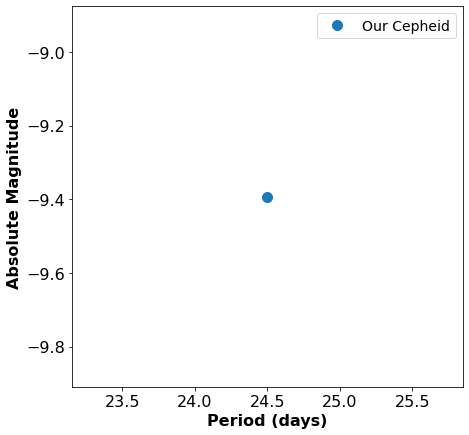

In [88]:
#Shape figure
plt.figure(figsize=(7,7))

#Make an array of periods 
periods = np.linspace(0,100,1000)
#plt.plot(periods,periods,linestyle='--',
  #           linewidth=4)

#Call the period_to_absolute_magnitude function inside the 
#plotting call to plot one point with our 
#best guess period and the corresponding absolute magnitude
plt.plot(period_guess,period_to_absolute_magnitude(period_guess),'o',
        label='Our Cepheid', markersize=10)

# Label the axes
#(Unneccessary, but nice) You can use a word processing language 
# called LaTeX to format axis labels
plt.xlabel('Period (days)', fontweight='bold', fontsize=16)
plt.ylabel('Absolute Magnitude',fontweight='bold',fontsize=16)

#Make tick numbers larger
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


#Add legend
plt.legend(fontsize=14)

Use your function from above to **calculate the absolute magnitude of the star** in the data:



### Measure the distance

To get the distance to the star, we need to use one more equation, which calculates the distance $d$ in parsecs to a star given its absolute magnitude $M$ and its apparent magnitude $m$: 

$$ M = m - 5 (\log_{10}{d} - 1) $$



If the apparent magnitude of this star is $m = 4$, **calcuate the distance to the star using your absolute magnitude calculated above.**

In [89]:
# Create function to calculate the distance to the Cepheid
def distance(m,M):
    """This function takes the apparent and absolute magnitudes
    and returns the distance to a star in parsec"""
    
    return 10 ** (((M-m)/(-5))+1)

In [90]:
# Calculate distance for our Cephied observation
m_cepheid = 4
cepheid_distance = distance(m_cepheid, period_to_absolute_magnitude(period_guess))
print('Distance to our Cepheid:',cepheid_distance,'parsecs')

Distance to our Cepheid: 4770.403721377565 parsecs


### _Phase-folded_ light curve

When you find the period of some periodic light curve, we often want to line up each cycle of the observations and line them up with one another, so you can see the pattern in detail. This is called _phase folding_. You can **phase fold the light curve replacing the `times` in your plotting commands with the modulus of the times in the light curve and the period**:

$$\textrm{folded times} = \textrm{times} \,\%\, \textrm{period}$$



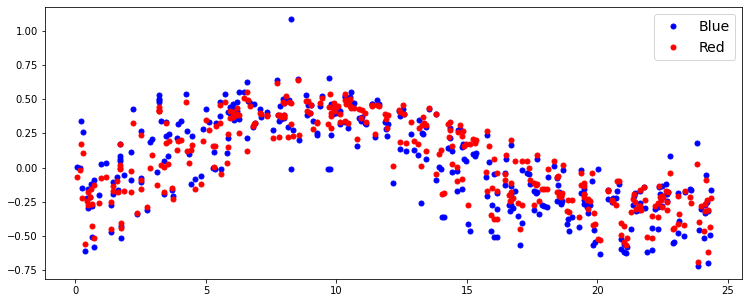

In [91]:
# Use the scatter plot we created for red and blue magnitude measurements
# Edit the plot so we plot the phase-folded light curve instead 
plt.figure(figsize=(12.5,5))

# Plot data points for blue and red magnitudes

plt.plot(data_table['Time'] % period_guess,data_table['Blue'],'o',markersize=5,
         color='Blue',label='Blue')
plt.plot(data_table['Time'] % period_guess,data_table['Red'],'o',markersize=5,
         color='Red',label='Red')

# Add a legend
plt.legend(fontsize=14)

### Making a periodogram

Astronomers are often looking for periodic signals in various forms of data. One of the diagnostic plots that astronomers often make when looking for periodicities is the *Lomb-Scargle periodogram*, which shows how periodic a signal is over a range of possible periods, allowing you to pick out the approximate period.

The function `lomb_scargle_periodogram` takes the times and fluxes from your light curve, and returns the strongest period in your light curve and makes a plot of the periodogram. **Run this function on both the red and the blue data, and identify the period of the light curve. How close was your guess from earlier?**

In [110]:
# Import the necessary functions
from astropy.stats import LombScargle
import warnings

# Define the lomb_scargle_periodogram function
def lomb_scargle_periodogram(times, fluxes):
    """
    Calculate the best period for a light curve using
    a Lomb-Scargle periodogram, and plot the periodogram.
    """
    frequency, power = LombScargle(times,fluxes).autopower()
    best_period_index = np.argmax(power)
    best_period = 1/frequency[best_period_index]
    
    # Plot the periodogram
    plt.plot(times z ,fluxes,'o',markersize=5)
    
    return best_period

<Quantity 24.91636025>

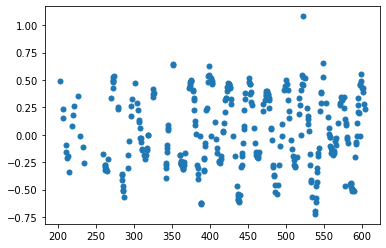

In [111]:
# Run function on blue magnitudes
lomb_scargle_periodogram(data_table['Time'],data_table['Blue'])

<Quantity 24.91636025>

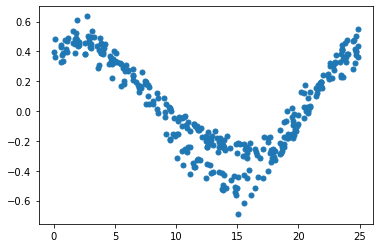

In [97]:
# Run function on red magnitudes
lomb_scargle_periodogram(data_table['Time'],data_table['Red'])

Write a short summary (in a word document) about what you learned from this research project- both in terms of cepheids, in terms of light curves and in terms of periodograms.  This document will help you put together your presentation.